In [8]:
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster
import scipy.ndimage
import glob

In [ ]:

def im2col(A, BSZ, stepsize=1):
    # Parameters
    m,n = A.shape
    s0, s1 = A.strides    
    nrows = m-BSZ[0]+1
    ncols = n-BSZ[1]+1
    shp = BSZ[0],BSZ[1],nrows,ncols
    strd = s0,s1,s0,s1

    out_view = np.lib.stride_tricks.as_strided(A, shape=shp, strides=strd)
    return out_view.reshape(BSZ[0]*BSZ[1],-1)[:,::stepsize]


def ndim2col(A, BSZ, stepsize=1):
    if(A.ndim == 2):
        return im2col(A, BSZ, stepsize)
    else:
        r,c,l = A.shape
        patches = np.zeros((l*BSZ[0]*BSZ[1],(r-BSZ[0]+1)*(c-BSZ[1]+1)))
        for i in range(l):
            patches[i*BSZ[0]*BSZ[1]:(i+1)*BSZ[0]*BSZ[1],:] = im2col(A[:,:,i],BSZ,stepsize)
        return patches


def get_gauss_feat_im(im, s):

    x = np.arange(-np.ceil(4*s),np.ceil(4*s)+1)
    g = np.exp(-x**2/(2*s**2))
    g = g/np.sum(g)
    dg = -x/(s**2)*g
    ddg = -1/(s**2)*g - x/(s**2)*dg
    dddg = -2/(s**2)*dg - x/(s**2)*ddg
    ddddg = -2/(s**2)*ddg - 1/(s**2)*ddg - x/(s**2)*dddg
    
    
    r,c = im.shape
    imfeat = np.zeros((r,c,15))
    imfeat[:,:,0] = scipy.ndimage.convolve1d(scipy.ndimage.convolve1d(im, g, axis=1), g, axis=0)
    imfeat[:,:,1] = scipy.ndimage.convolve1d(scipy.ndimage.convolve1d(im, dg, axis=1), g, axis=0)
    imfeat[:,:,2] = scipy.ndimage.convolve1d(scipy.ndimage.convolve1d(im, g, axis=1), dg, axis=0)
    imfeat[:,:,3] = scipy.ndimage.convolve1d(scipy.ndimage.convolve1d(im, ddg, axis=1), g, axis=0)
    imfeat[:,:,4] = scipy.ndimage.convolve1d(scipy.ndimage.convolve1d(im, g, axis=1), ddg, axis=0)
    imfeat[:,:,5] = scipy.ndimage.convolve1d(scipy.ndimage.convolve1d(im, dg, axis=1), dg, axis=0)
    imfeat[:,:,6] = scipy.ndimage.convolve1d(scipy.ndimage.convolve1d(im, dddg, axis=1), g, axis=0)
    imfeat[:,:,7] = scipy.ndimage.convolve1d(scipy.ndimage.convolve1d(im, g, axis=1), dddg, axis=0)
    imfeat[:,:,8] = scipy.ndimage.convolve1d(scipy.ndimage.convolve1d(im, ddg, axis=1), dg, axis=0)
    imfeat[:,:,9] = scipy.ndimage.convolve1d(scipy.ndimage.convolve1d(im, dg, axis=1), ddg, axis=0)
    imfeat[:,:,10] = scipy.ndimage.convolve1d(scipy.ndimage.convolve1d(im, g, axis=1), ddddg, axis=0)
    imfeat[:,:,11] = scipy.ndimage.convolve1d(scipy.ndimage.convolve1d(im, dg, axis=1), dddg, axis=0)
    imfeat[:,:,12] = scipy.ndimage.convolve1d(scipy.ndimage.convolve1d(im, ddg, axis=1), ddg, axis=0)
    imfeat[:,:,13] = scipy.ndimage.convolve1d(scipy.ndimage.convolve1d(im, dddg, axis=1), dg, axis=0)
    imfeat[:,:,14] = scipy.ndimage.convolve1d(scipy.ndimage.convolve1d(im, ddddg, axis=1), g, axis=0)

    return imfeat

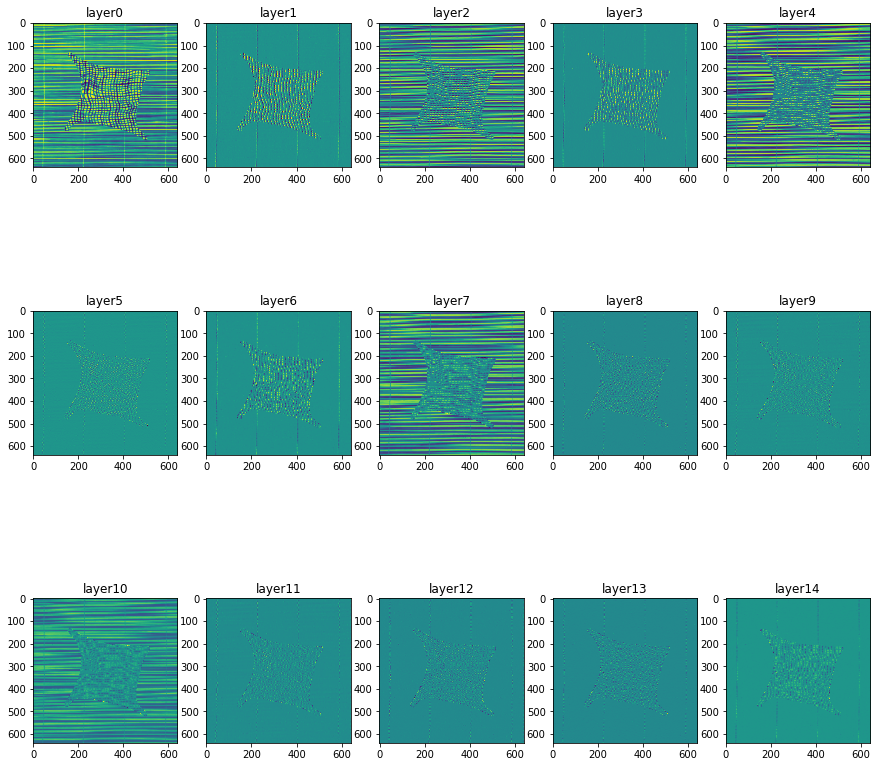

In [6]:
    
filename = 'data/test_C_image.png'
I = skimage.io.imread(filename)
I = I.astype(np.float)

s = 1
gf = get_gauss_feat_im(I, s)

fig,ax = plt.subplots(3,5, figsize=(15, 15))
for j in range(5):
    for i in range(3):
        ax[i][j].imshow(gf[:,:,5*i+j])
        ax[i][j].set_title(f'layer{5*i+j}')
    

In [10]:
files = glob.glob('data/*.png')
files

['data/bone_train.png',
 'data/test_A_ground_truth.png',
 'data/test_C_image.png',
 'data/test_A_background.png',
 'data/test_C_background.png',
 'data/bone_label.png',
 'data/train_A_image.png',
 'data/bone_test.png',
 'data/test_B_background.png',
 'data/test_B_image.png',
 'data/train_B_image.png',
 'data/test_A_foreground.png',
 'data/test_C_ground_truth.png',
 'data/test_A_image.png',
 'data/test_B_foreground.png',
 'data/train_C_image.png',
 'data/test_C_foreground.png',
 'data/test_B_ground_truth.png']

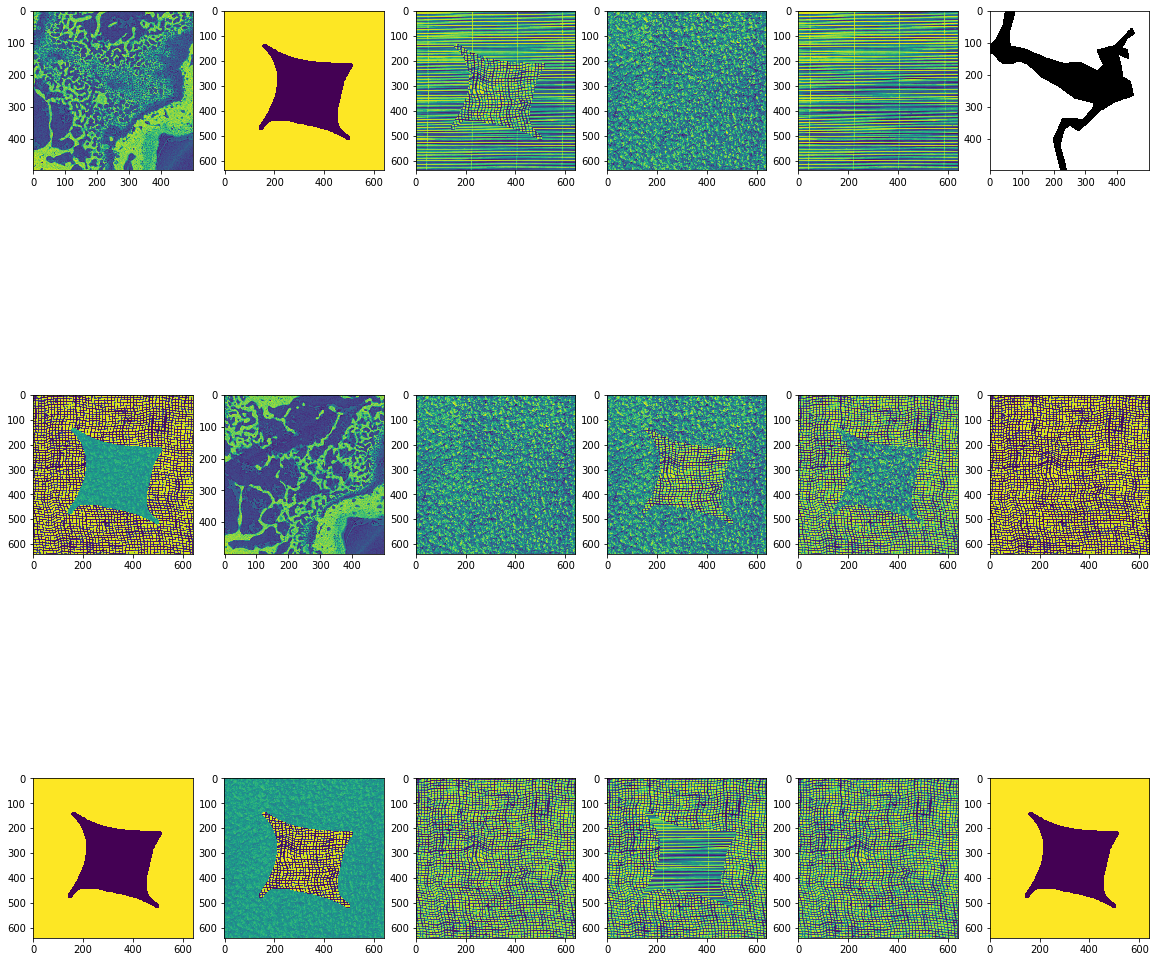

In [14]:
figure, axes = plt.subplots(3, 6, figsize=(20, 20))
axes = np.ravel(axes)
for file, ax in zip(files, axes):
    image = plt.imread(file)
    ax.imshow(image)


In [17]:
# figure, axes = plt.subplots(3, 6, figsize=(20, 20))
# axes = np.ravel(axes)
# for file, ax in zip(files, axes):
#     image = plt.imread(file)
#     image = get_gauss_feat_im(image, 3)
    

In [ ]:
train = 'data/train_A_image.png'
test = 'data/test_A_image.png'



